In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [108]:
dataset_cols = [
    "bike_count",
    "hour",
    "temp",
    "humidity",
    "wind",
    "visibility",
    "dew_pt_temp",
    "radiation",
    "rain",
    "snow",
    "functional"
]

df = pd.read_csv("SeoulBikeData.csv", encoding="latin1").drop(["Date","Holiday","Seasons"], axis=1)
df.columns = dataset_cols
df.head()



,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [109]:
df["functional"] = (df["functional"]=="Yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


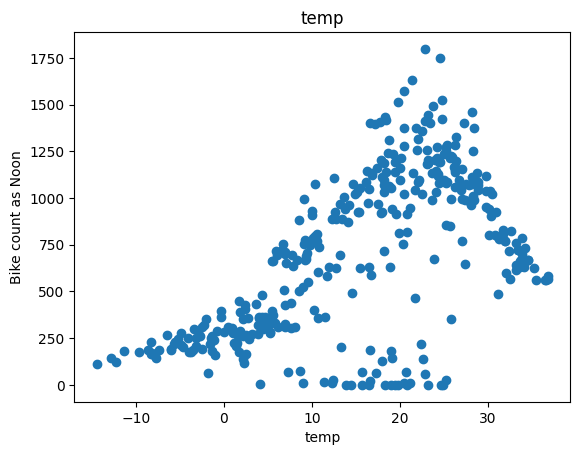

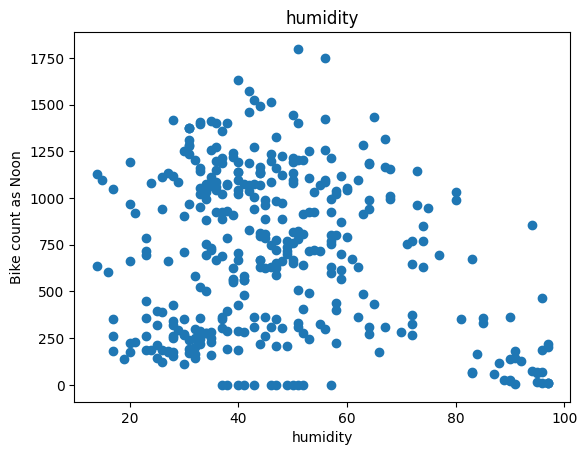

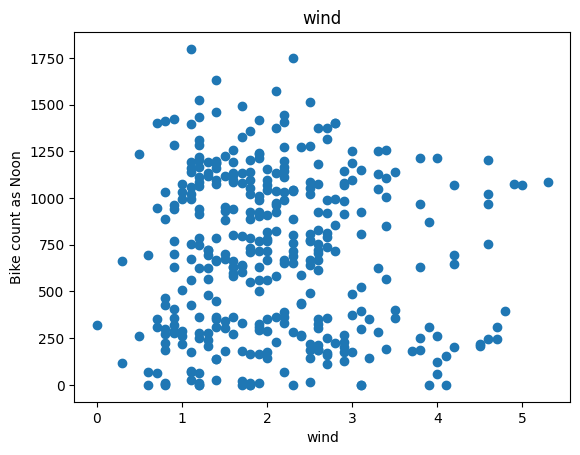

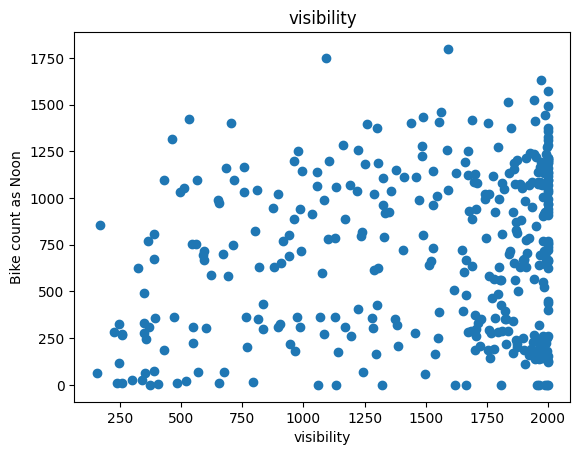

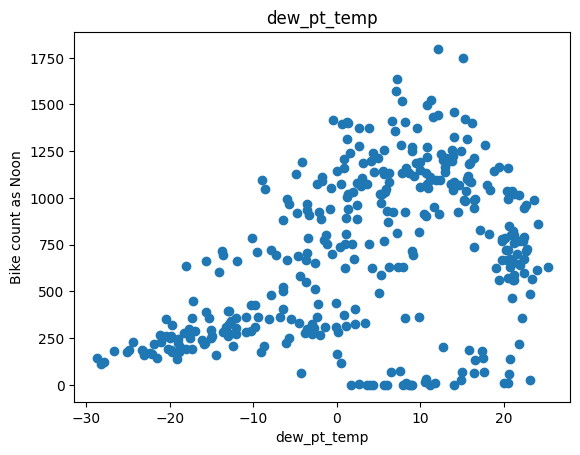

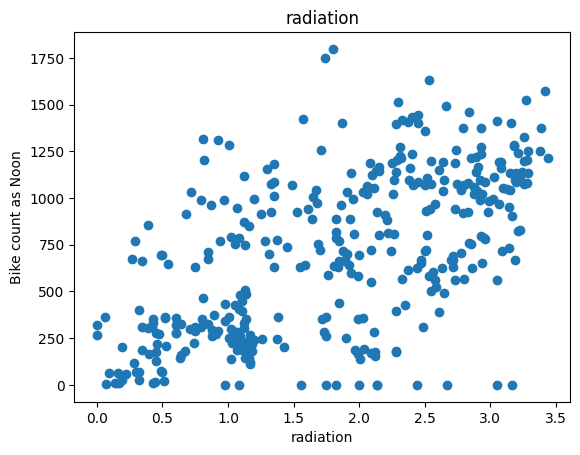

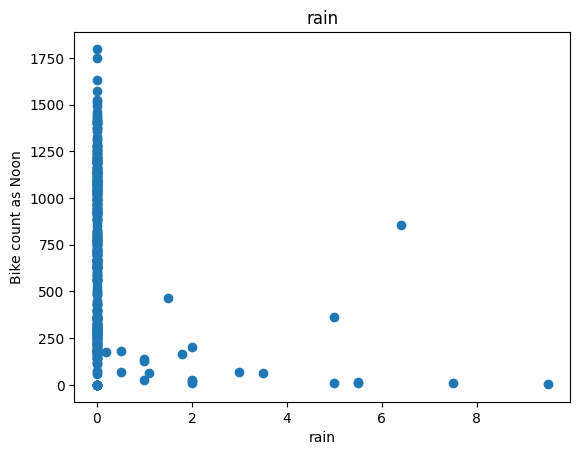

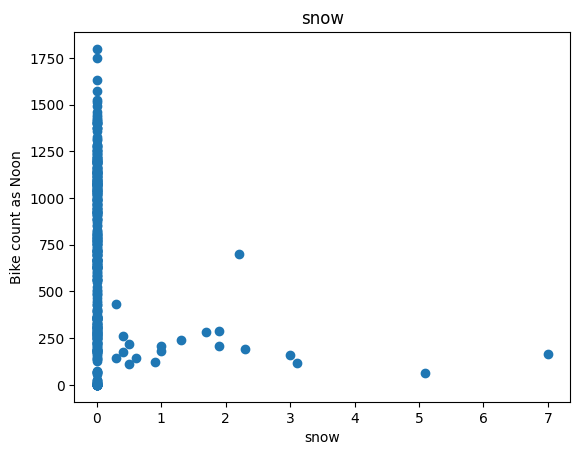

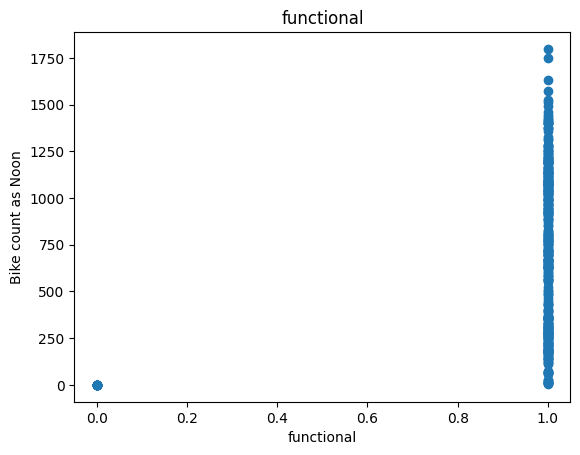

In [110]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike count as Noon")
    plt.show()
    

In [111]:
df = df.drop(["wind", "visibility", "functional"],axis= 1)

In [112]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


<span style="background-color:brown; font-size:20px;">Train/Valid/Test Dataset</span>

In [113]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

C:\Users\ShadowLord\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [114]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if  x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data , X , y
            

In [115]:
_ , X_train_temp, y_train_temp = get_xy(train,"bike_count",x_labels = ["temp"])
_ , X_valid_temp, y_valid_temp = get_xy(valid,"bike_count",x_labels = ["temp"])
_ , X_test_temp, y_test_temp = get_xy(test,"bike_count",x_labels = ["temp"])

In [116]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [117]:
print(temp_reg.coef_, temp_reg.intercept_)

[[22.03746741]] [399.04263501]


In [118]:
temp_reg.score(X_test_temp, y_test_temp)

0.31424044776332527

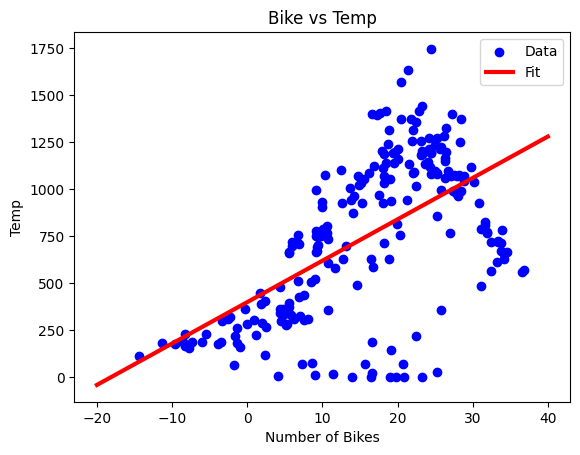

In [119]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)),label = "Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Number of Bikes")
plt.ylabel("Temp")
plt.show()

<span style="background-color:brown; font-size:20px;">Multiple Linear Regression</span>

In [120]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [121]:
_ , X_train_all, y_train_all = get_xy(train,"bike_count",x_labels = df.columns[1:])
_ , X_valid_all, y_valid_all = get_xy(valid,"bike_count",x_labels = df.columns[1:])
_ , X_test_all, y_test_all = get_xy(test,"bike_count",x_labels = df.columns[1:])

In [122]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [123]:
all_reg.score(X_test_all, y_test_all)

0.4856618302663449

<span style="background-color:brown; font-size:20px;">Regression with Neural Network</span>

In [124]:
def plot_loss(history):
    plt.plot(history.history['loss'],label = 'loss')
    plt.plot(history.history['val_loss'],label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [125]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1,1))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [126]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [127]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [128]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp, 
    verbose = 0,epochs =  1000,
    validation_data = (X_valid_temp,y_valid_temp)
)

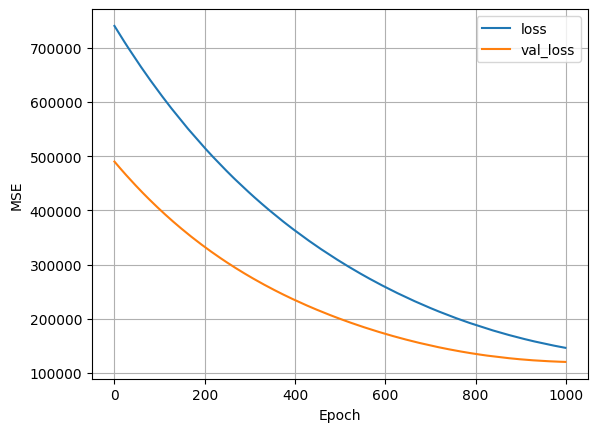

In [129]:
plot_loss(history)

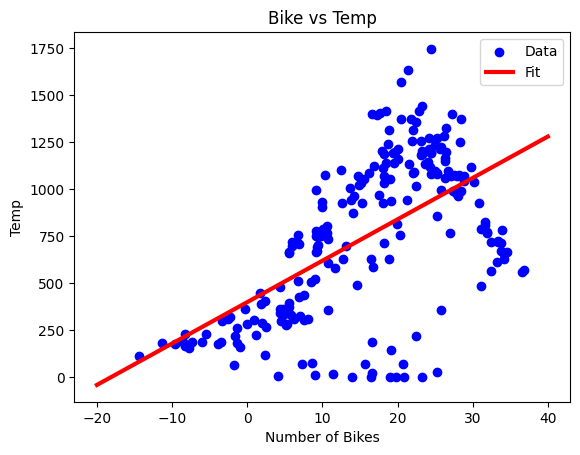

In [131]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)),label = "Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Number of Bikes")
plt.ylabel("Temp")
plt.show()

<span style="background-color:brown; font-size:20px;">Neural Network</span>

In [190]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1,1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [191]:
history = nn_model.fit(
    X_test_temp,
    y_test_temp,
    validation_data = (X_valid_temp,y_valid_temp),
    verbose = 0, epochs = 100
)


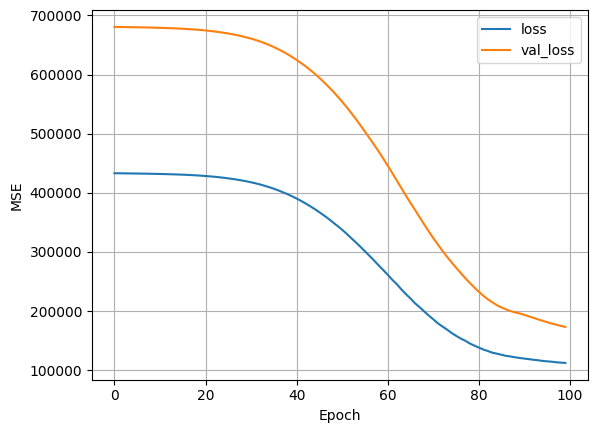

In [192]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


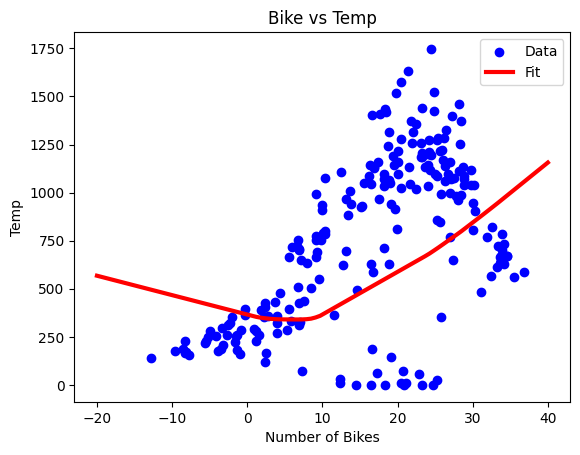

In [193]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)),label = "Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Number of Bikes")
plt.ylabel("Temp")
plt.show()